In [2]:
import torch
import torch.nn as nn
from torch.autograd import Variable
import torch.utils.data as Data
import torchvision
import matplotlib.pyplot as plt
from IPython import display
import numpy as np

LR = 0.001
TIME_STEP = 10 # rnn time step / image height
INPUT_SIZE = 1 # rnn input size / image width
EPOCH = 1

In [3]:
steps = np.linspace(0, np.pi * 2, 100, dtype=np.float32)
x_np = np.sin(steps)
y_np = np.cos(steps)

class RNN(nn.Module):
    def __init__(self):
       super(RNN, self).__init__() 
       self.rnn = nn.RNN(
           input_size=INPUT_SIZE,
           hidden_size=32,
           num_layers=1,
           batch_first=True
       )
       self.out = nn.Linear(32, 1)

    def forward(self, x, h_state):
        # r_out (batch, time_step, hidden_size)
        r_out, h_state = self.rnn(x, h_state)
        outs = []
        for time_step in range(r_out.size(1)):
            outs.append(self.out(r_out[:, time_step, :]))
        return torch.stack(outs, dim=1), h_state
rnn = RNN()
print(rnn)

RNN(
  (rnn): RNN(1, 32, batch_first=True)
  (out): Linear(in_features=32, out_features=1, bias=True)
)


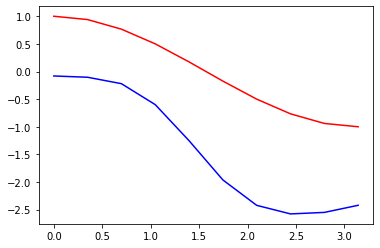

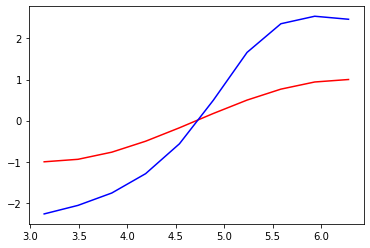

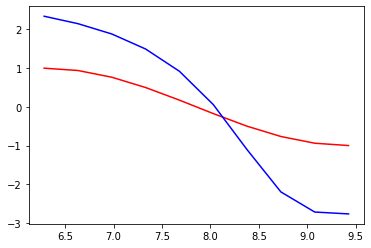

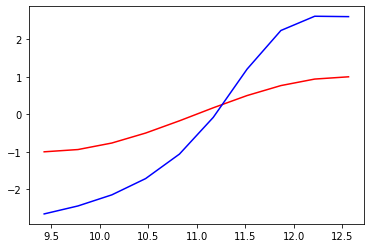

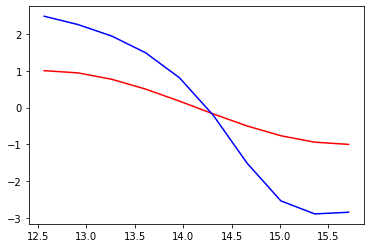

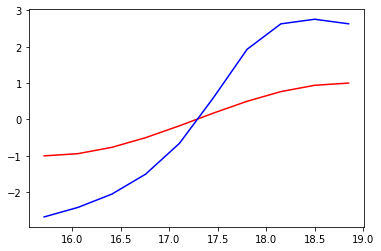

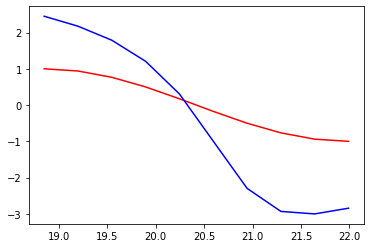

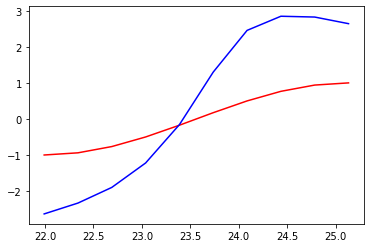

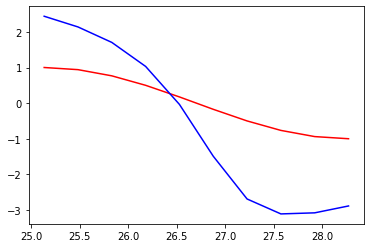

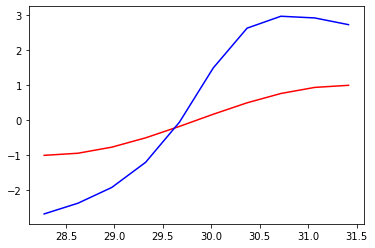

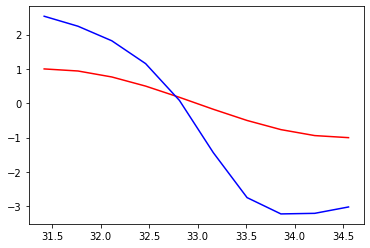

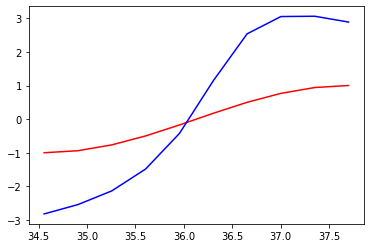

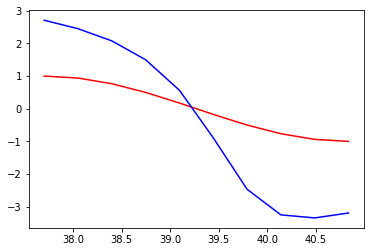

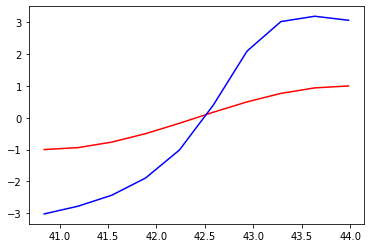

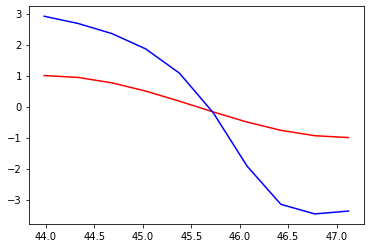

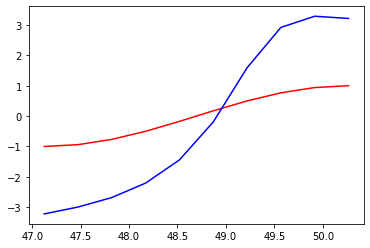

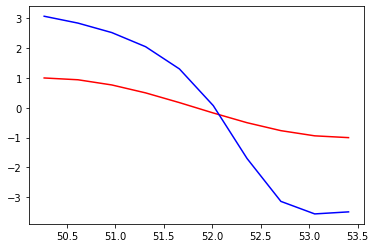

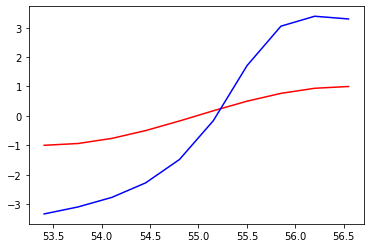

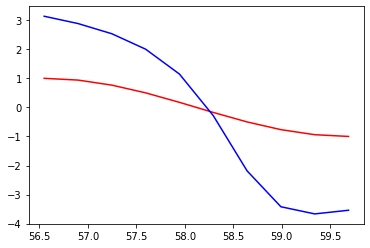

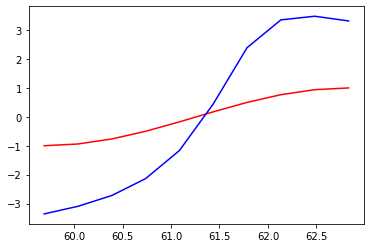

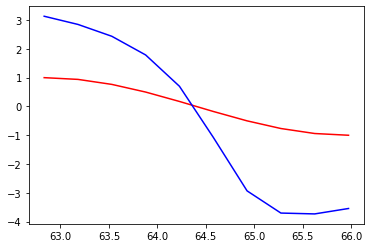

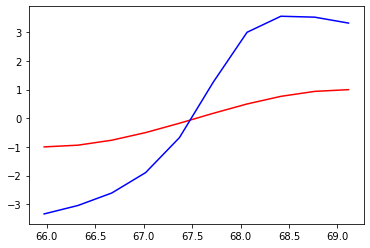

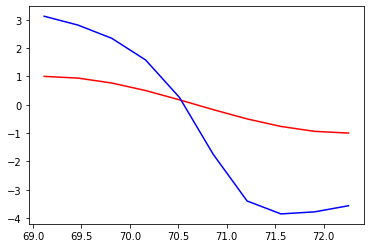

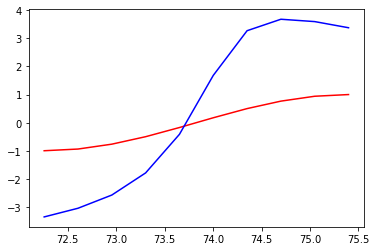

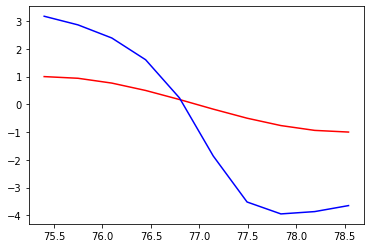

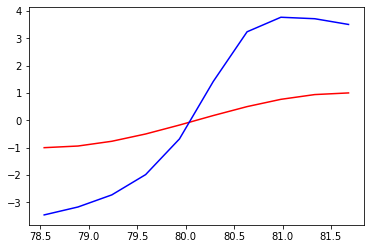

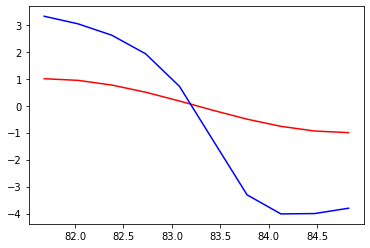

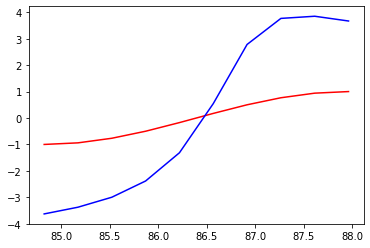

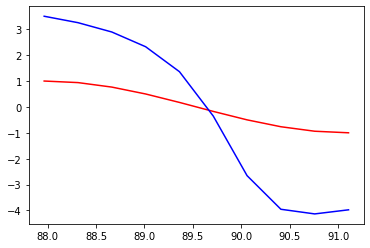

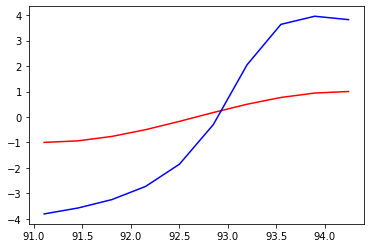

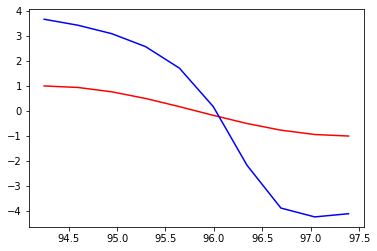

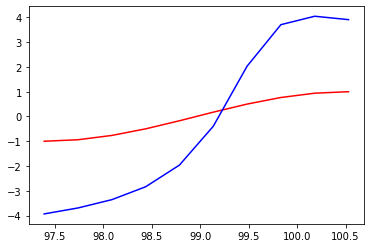

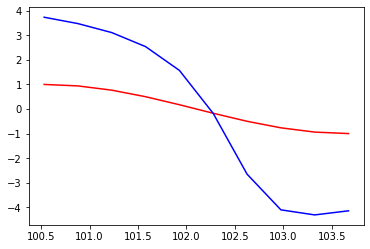

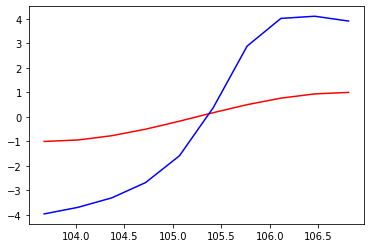

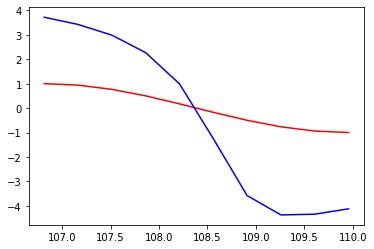

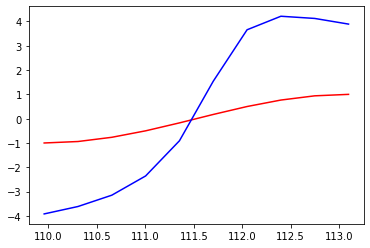

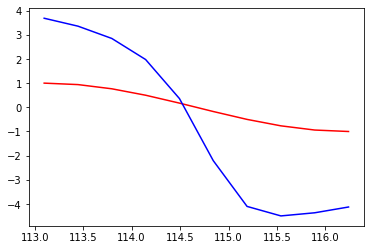

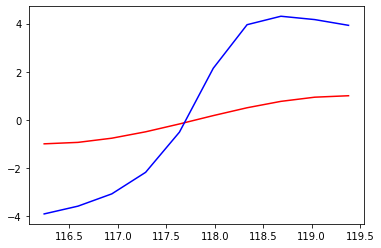

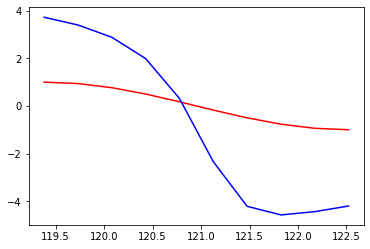

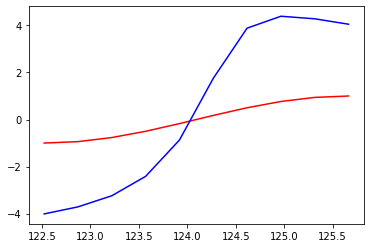

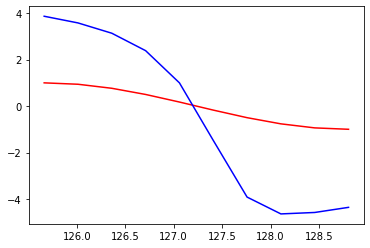

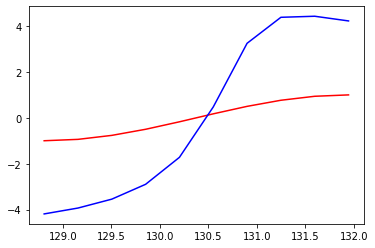

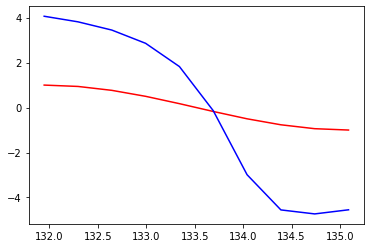

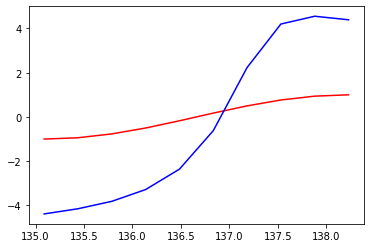

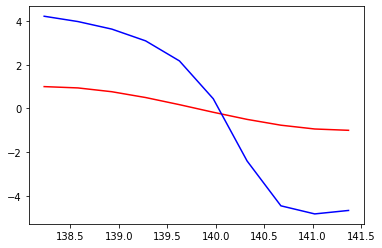

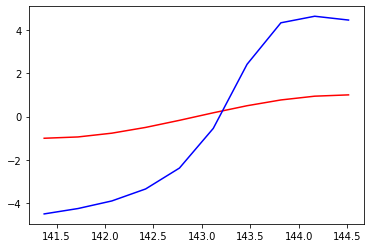

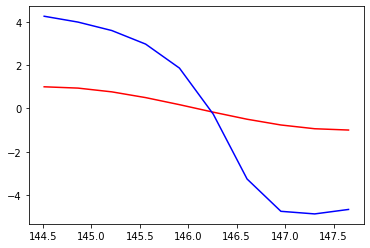

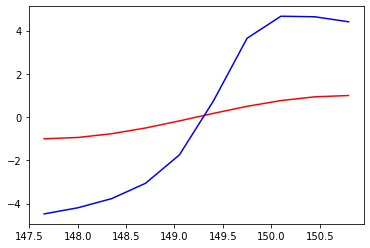

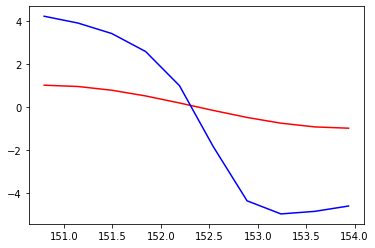

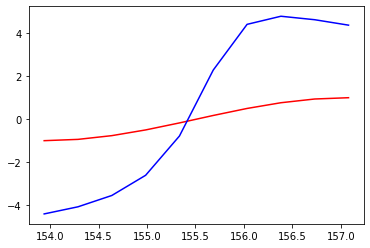

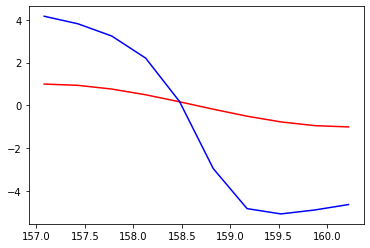

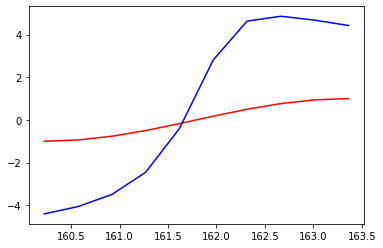

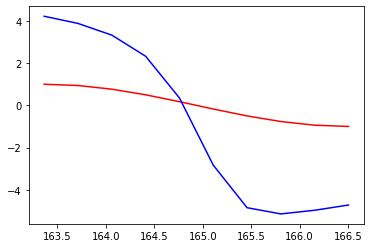

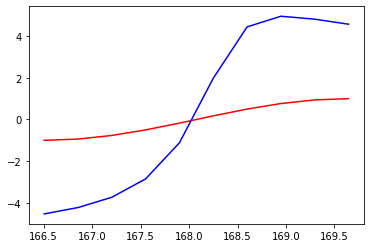

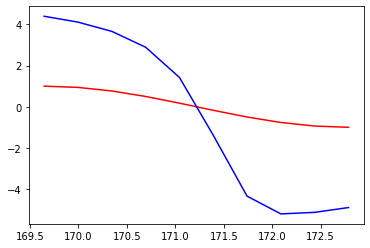

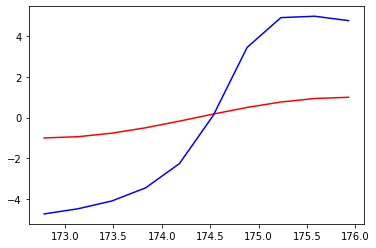

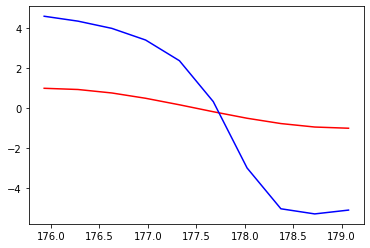

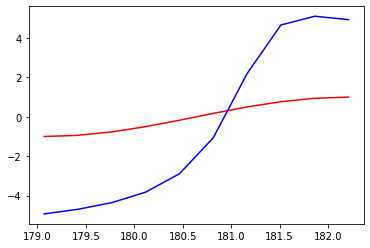

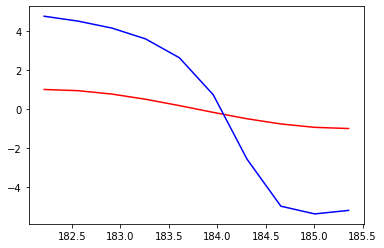

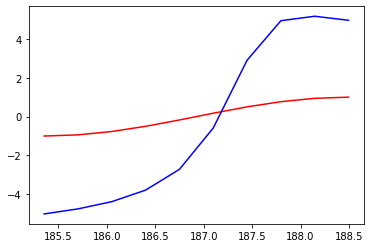

In [9]:
optimizer = torch.optim.Adam(rnn.parameters(), lr=LR)
loss_func = nn.CrossEntropyLoss()

h_state = None
for step in range(60):
    start, end = step * np.pi, (step + 1) * np.pi
    steps = np.linspace(start, end, TIME_STEP, dtype=np.float32)

    x_np = np.sin(steps)
    y_np = np.cos(steps)

    x = Variable(torch.from_numpy(x_np[np.newaxis, :, np.newaxis])) # (batch, time_step, input_size)
    y = Variable(torch.from_numpy(y_np[np.newaxis, :, np.newaxis]))

    prediction, h_state = rnn(x, h_state)
    h_state = Variable(h_state.data) # important

    loss = loss_func(prediction, y)
    optimizer.zero_grad()
    loss.backward() # backpropagation
    optimizer.step()

    # plotting
    plt.plot(steps, y_np.flatten(), 'r-')
    plt.plot(steps, prediction.data.numpy().flatten(), 'b-')
    plt.draw(); 
    # display.clear_output()
    plt.pause(0.05)